In [1]:
import random
import matplotlib.pyplot as plt
import math


def bernouli(p):
    if random.random() < p: #between p: probability
        return 1
    else:
        return 0
    
def binomial(n,p):
    return sum(bernouli(p) for _ in range(n))


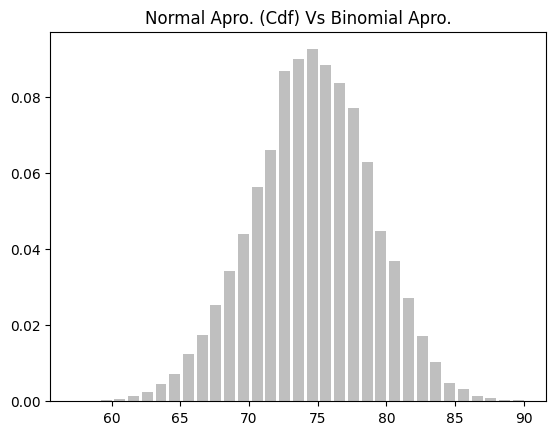

In [2]:
from collections import Counter

def normal_culmutative_dis_func(x,mu=0,sigma=1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

def his_dist(p,n,points):

    data=[binomial(n,p) for v in range(points)]
    histogram=Counter(data)

    #1: Binomial
    plt.bar([x-0.4 for x in histogram.keys()],
            [c/points for c in histogram.values()],0.8,color='0.75')
    
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))

    #2: Normal Aproximation cul (Cdf)
    xz=range(max(data),min(data)+1)
    yz=[normal_culmutative_dis_func(u+0.5,mu,sigma) - normal_culmutative_dis_func(u-0.5,mu,sigma) for u in xz] # u inverses ops

    plt.plot(xz,yz)
    plt.title("Normal Apro. (Cdf) Vs Binomial Apro.")
    plt.show()

his_dist(0.75,100,10000)



range(57, 90)


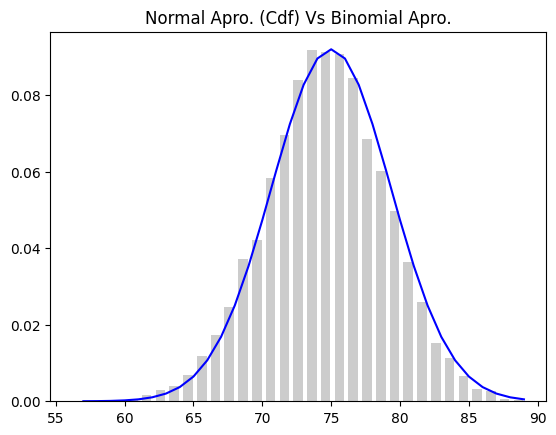

In [5]:
def his_dist(p,n,points):

    data=[binomial(n,p) for v in range(points)]
    histogram=Counter(data)

    #1: Binomial
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))

    #2: Normal Aproximation cul (Cdf)
    xz=range(min(data),max(data)+1)
    yz=[normal_culmutative_dis_func(u+0.5,mu,sigma) - normal_culmutative_dis_func(u-0.5,mu,sigma) for u in xz] # u inverses ops

    print(xz)

    plt.bar([x-0.4 for x in histogram.keys()],
            [c/points for c in histogram.values()],0.7,color='0.8')
    
    plt.plot(xz,yz,color="blue",alpha=1)
    
    plt.title("Normal Apro. (Cdf) Vs Binomial Apro.")
    plt.show()


his_dist(0.75,100,10000)

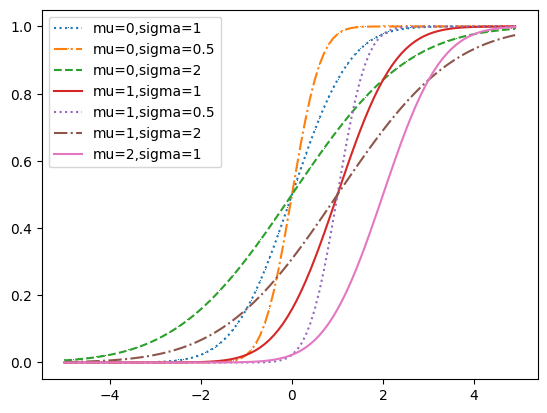

In [5]:
xc=[x/10 for x in range(-50,50)]

plt.plot(xc,[normal_culmutative_dis_func(d,mu=0,sigma=1) for d in xc],":,",label="mu=0,sigma=1")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=0,sigma=0.5) for d in xc],"-.,",label="mu=0,sigma=0.5")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=0,sigma=2) for d in xc],"--,",label="mu=0,sigma=2")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=1,sigma=1) for d in xc],"-",label="mu=1,sigma=1")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=1,sigma=0.5) for d in xc],":",label="mu=1,sigma=0.5")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=1,sigma=2) for d in xc],"-.",label="mu=1,sigma=2")
plt.plot(xc,[normal_culmutative_dis_func(d,mu=2,sigma=1) for d in xc],"-",label="mu=2,sigma=1")

plt.legend()
plt.show()

In [ ]:
#Here we discover a variable range by his probability

def inverse_prob_cdf(p,mu=0,sigma=1,tolerance=0.00001):
#if not standard:
    if mu!=0 or sigma!=1:
        return mu + sigma * inverse_prob_cdf(p,tolerance=tolerance)

    low_z,low_p= -10,0 #var,prob
    hg_z,hg_p= 10,1 # cfd(10) prob next to 1 (high)


    #using binary search for search the most close prob var of p
    while hg_z - low_z > tolerance:
        med_z=(low_z+hg_z)/2 # still too long
        med_p=normal_culmutative_dis_func(p) #prob of z
        if med_p > p:
            hg_p,hg_z=med_p,med_z
        elif med_p < p:
            low_p,low_z=med_p,med_z
        else:
            break
    return med_z # var prob of p